Dr. Ernest Chan, managing member of QTS Capital Management, presented "Peculiarities of Volatility" at our annual quant trading conference, QuantCon. You can check out the video of his talk [here](https://vimeo.com/163631798), and for more detail, read through his [presentation deck](http://www.slideshare.net/Quantopian/peculiarities-of-volatilities-by-ernest-chan-at-quantcon-2016). The notebook below replicates the volatility study found in the talk, and point to other arbitrage strategies.

The talk is centered around the following three concepts: 

    1. Predicting realized volatility is easy, but you can't trade it. 
    2. You can only trade implied volatility. 
    3. But you can arbitrage between current implied and predicted realized volatility on roll returns.

The most notable section of his study found concluded with a simple, elegant formula.

sgn(roll returns of VX) = sgn(VIX - VX futures)


### Predicting Volatility

The Quantopian lectures greatly detail the process of GARCH modeling. Essentially, the volatility of a time series is related to the past volatility. 

As presented by Dr. Ernie Chan during QuantCon 2016, GARCH models can predict the forward volatility of the S&P 500 with a significant accuracy. This predictive ability is not without limitation, however.

#### My Selected Garch Model

While Dr. Chan uses a linear GARCH model, I chose to use the GARCH(1,1) for predictive volatility.

$$\sigma^2_{k} = \omega + \alpha\ r_{k-1}^2 + \beta\sigma^2_{k-1}$$

I used scipy to find the minimum value of the likelihood function. Then, I checked the difference between the predicted and the current implied volatility to see if this was near contstant.

### Trading Volatility

The first major problem with predicting volatility is the fact that you can't trade it. In other words, the prediction of volatilty has no clear analogue to the stock market. The reason? The CBOE's S&P 500 Volatility Index (VIX) is not a tradeable security. Further, the exchange traded funds (ETFs) that track the VIX do so in a roundabout way.

Two recent ETFs (VDXN and VXUP) tried to track the spot price of VIX, but they very often trade \+- 10% away from the VIX's price. 


### Short VXX at constant volatility Algorithm
From http://epchan.blogspot.com/2015/11/predicting-volatility.html

>If GARCH tells us that the realized volatility will increase tomorrow, most of us would instinctively go out and buy ourselves some options (i.e. implied volatility). In the case of SPY, we would probably go buy some VXX. But that would be a terrible mistake. Remember that the volatility we predicted is an unsigned return: a prediction of increased volatility may mean a very bullish day tomorrow. A high positive return in SPY is usually accompanied by a steep drop in VXX. In other words, an increase in realized volatility is usually accompanied by a decrease in implied volatility in this case. But what is really strange is that this anti-correlation between change in realized volatility and change in implied volatility also holds when the return is negative (57% of the days with negative returns). A very negative return in SPY is indeed usually accompanied by an increase in implied volatility or VXX, inducing positive correlation. But on average, an increase in realized volatility due to negative returns is still accompanied by a decrease in implied volatility.


The upshot of all these is that if you predict the volatility of SPY will increase tomorrow, you should short VXX instead.

Below are the full results of the backtest.

**To view an expanded view of the backtest tearsheet, click the left margin of the cell**

100% Time: 0:00:13|###########################################################|
Entire data start date: 2009-02-02
Entire data end date: 2016-06-23


Backtest Months: 88
                   Backtest
annual_return          0.56
annual_volatility      0.62
sharpe_ratio           1.04
calmar_ratio           0.77
stability              0.88
max_drawdown          -0.73
omega_ratio            1.19
sortino_ratio          1.42
skewness              -0.71
kurtosis               2.51
information_ratio      0.06
alpha                  0.26
beta                   2.74

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
4              73.09 2011-07-07  2011-12-08    2012-09-07      307
1              50.07 2015-08-10  2015-09-01    2015-10-28       58
0              49.05 2015-11-02  2016-02-18           NaT      NaN
2              44.86 2014-07-03  2015-01-30    2015-05-21      231
3              22.60 2015-06-23  2015-07-09    2015-07-20       20


2-sigma re

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


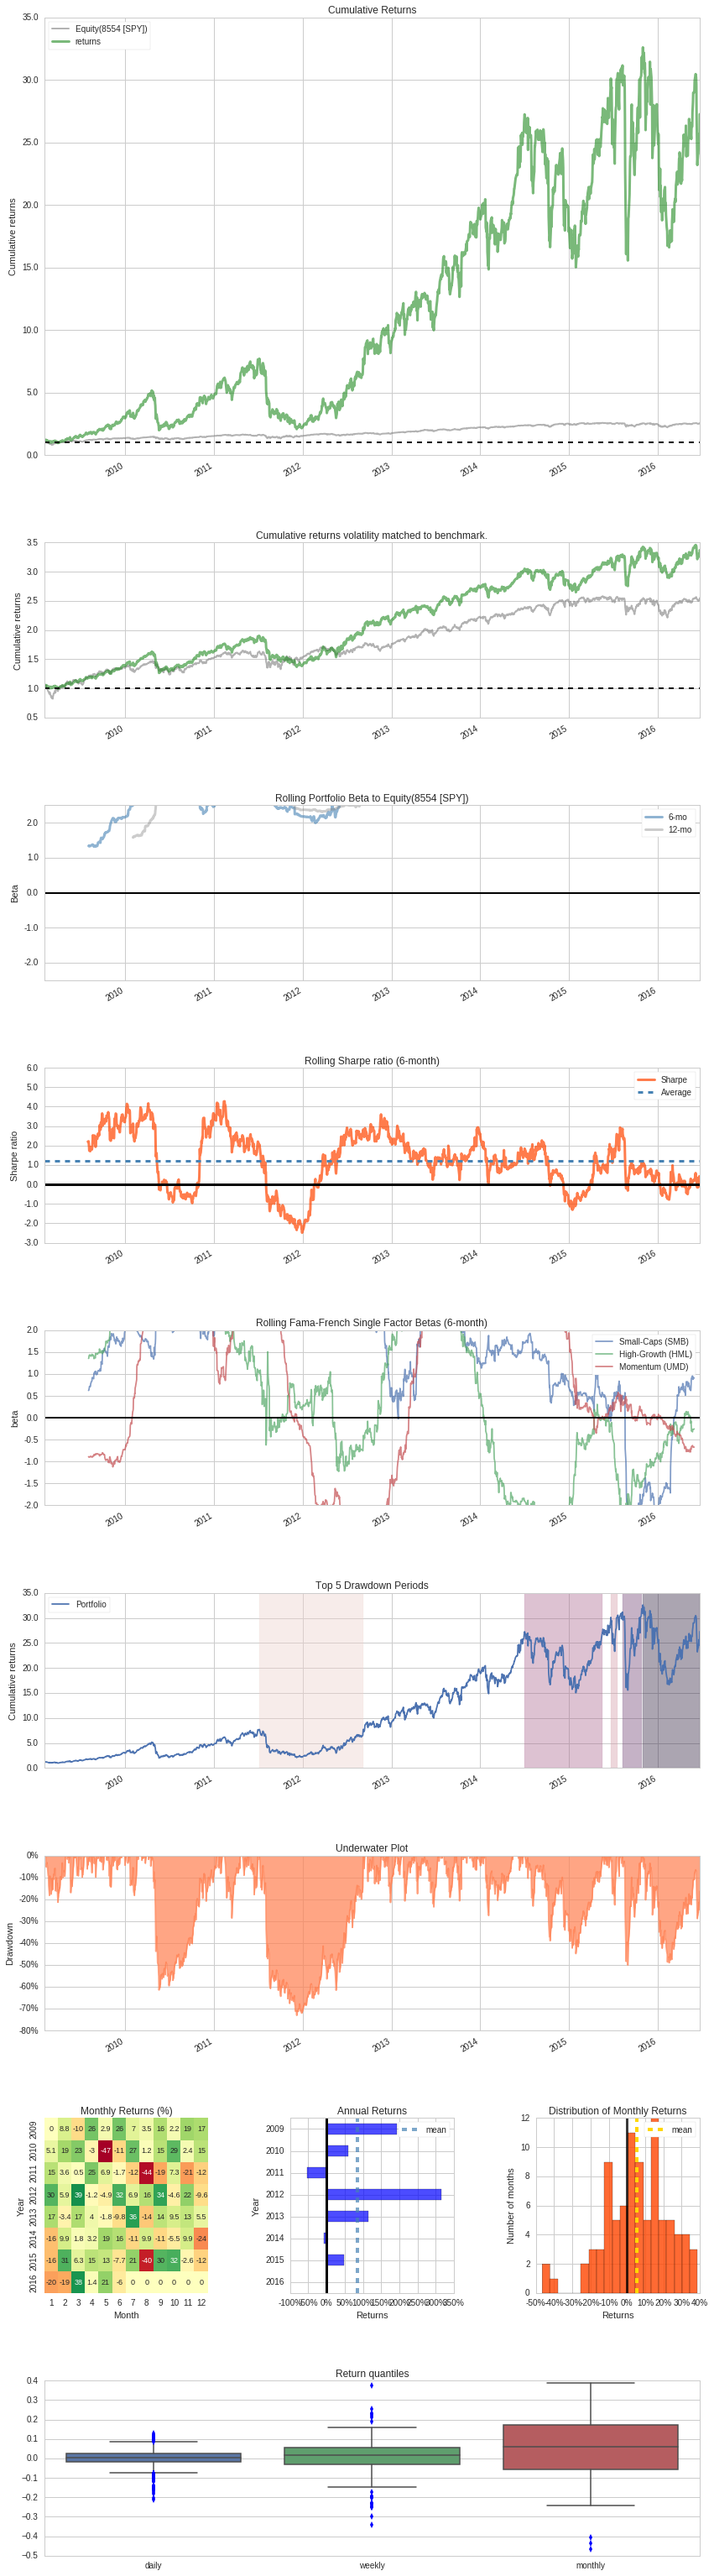


Stress Events
                                    mean    min    max
US downgrade/European Debt Crisis -0.017 -0.205  0.108
Fukushima                          0.010 -0.082  0.077
EZB IR Event                       0.006 -0.078  0.092
2009Q1                             0.005 -0.054  0.098
2009Q2                             0.004 -0.099  0.073
Flash Crash                       -0.053 -0.171  0.123
Apr14                              0.002 -0.060  0.035
Oct14                             -0.001 -0.114  0.085
Fall2015                          -0.004 -0.212  0.115
GFC Crash                          0.001 -0.075  0.098
Recovery                           0.003 -0.205  0.123
New Normal                         0.002 -0.212  0.129


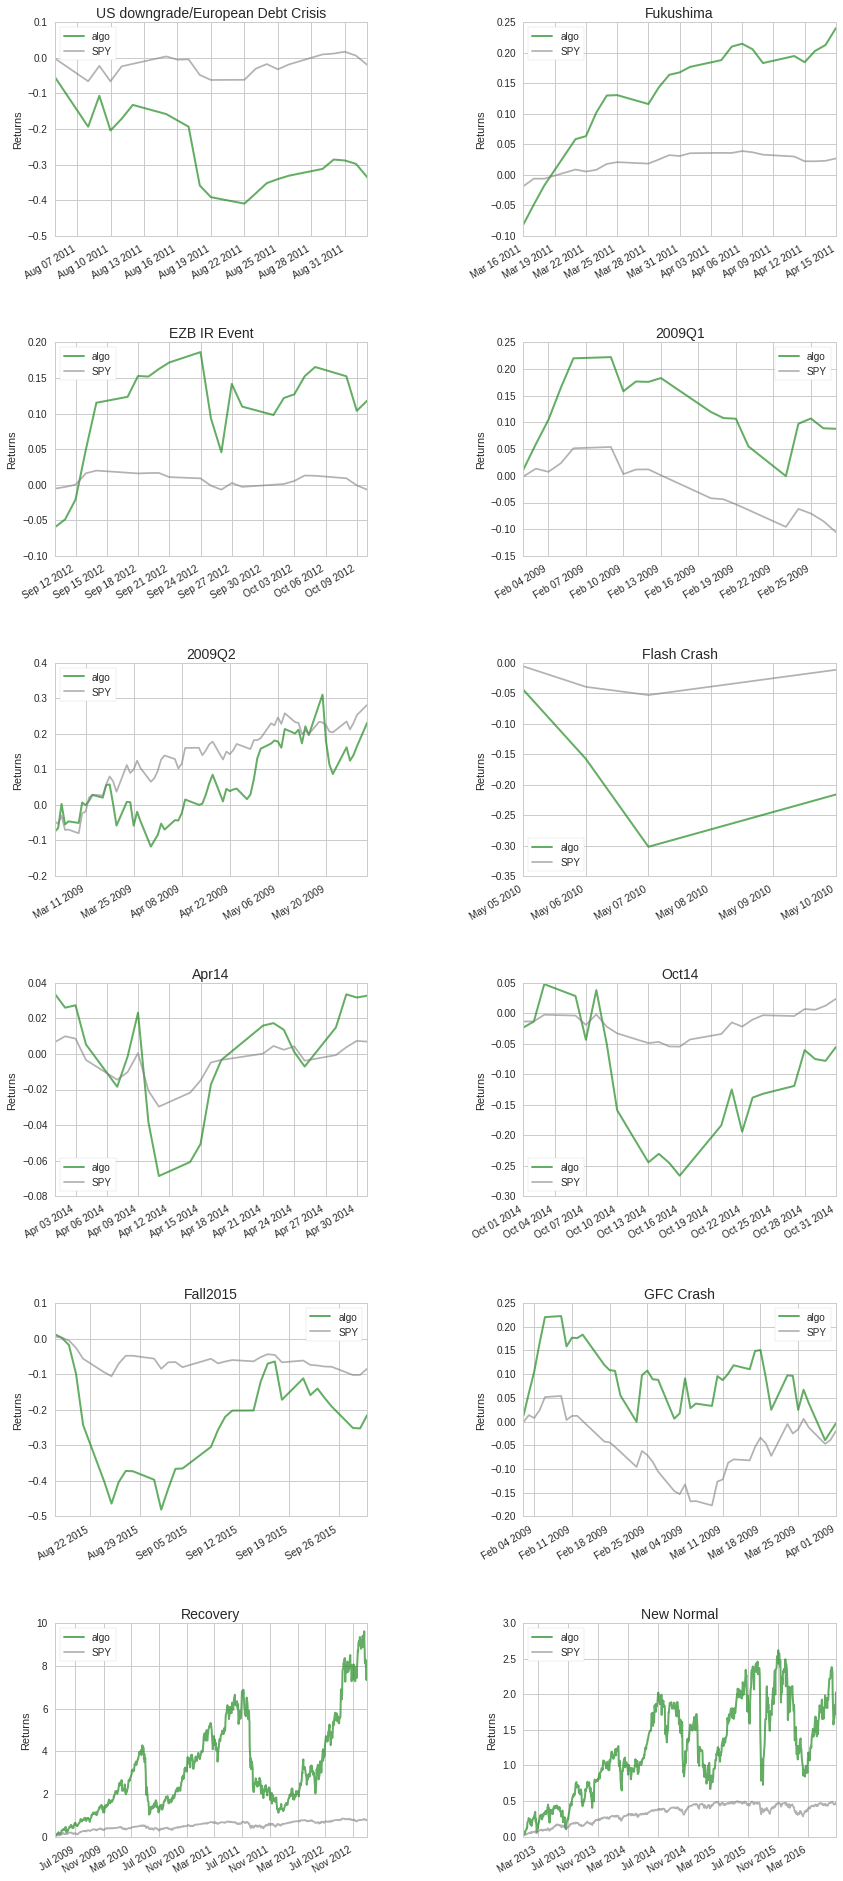



Top 10 long positions of all time (and max%)
[u'VXX-38054']
[ 1.026]


Top 10 short positions of all time (and max%)
[u'VXX-38054']
[-1.394]


Top 10 positions of all time (and max%)
[u'VXX-38054']
[ 1.394]


All positions ever held
[u'VXX-38054']
[ 1.394]




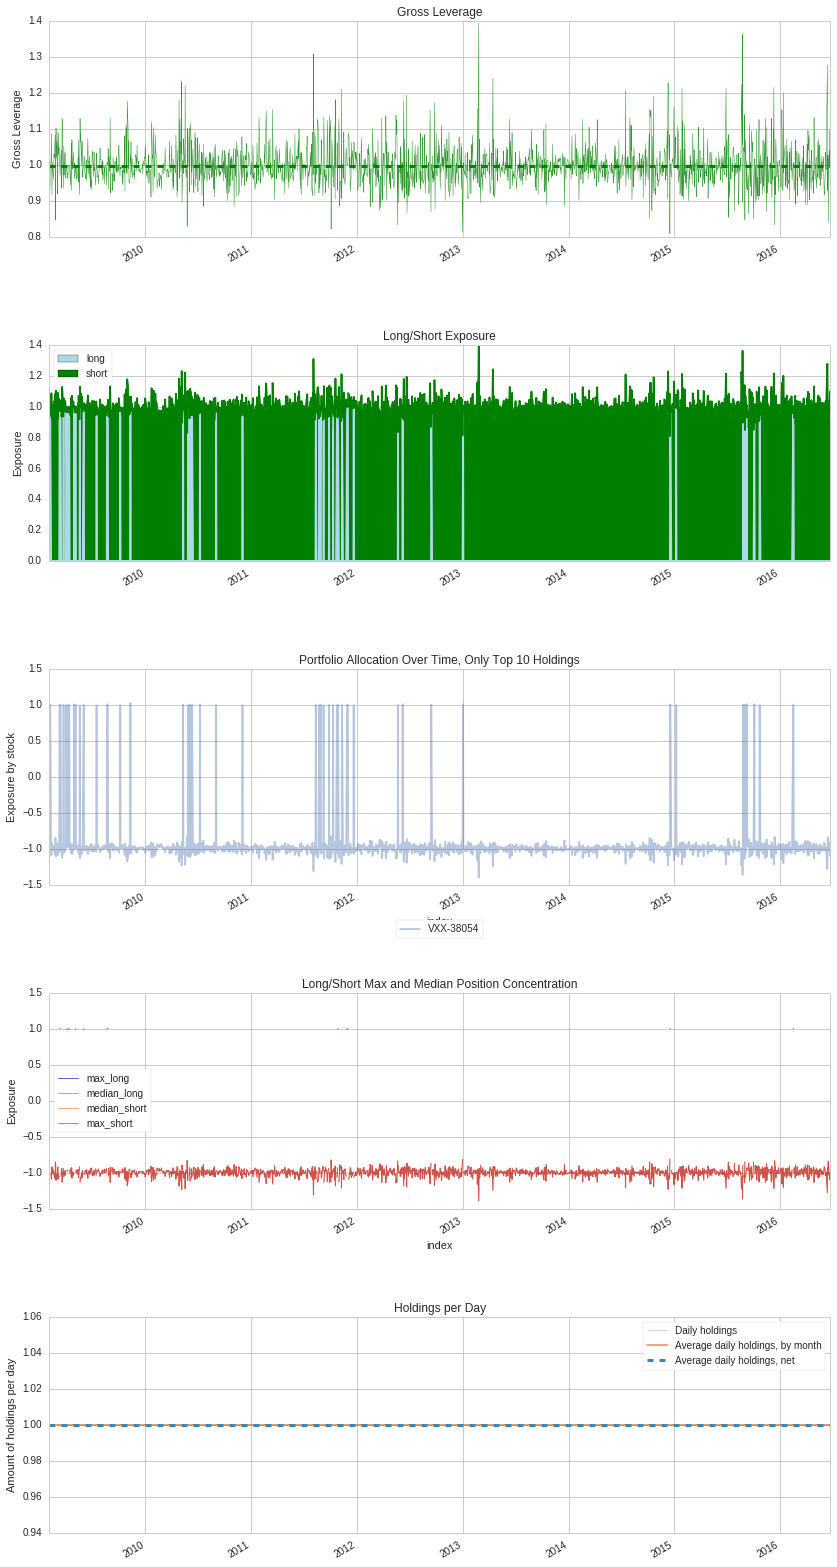

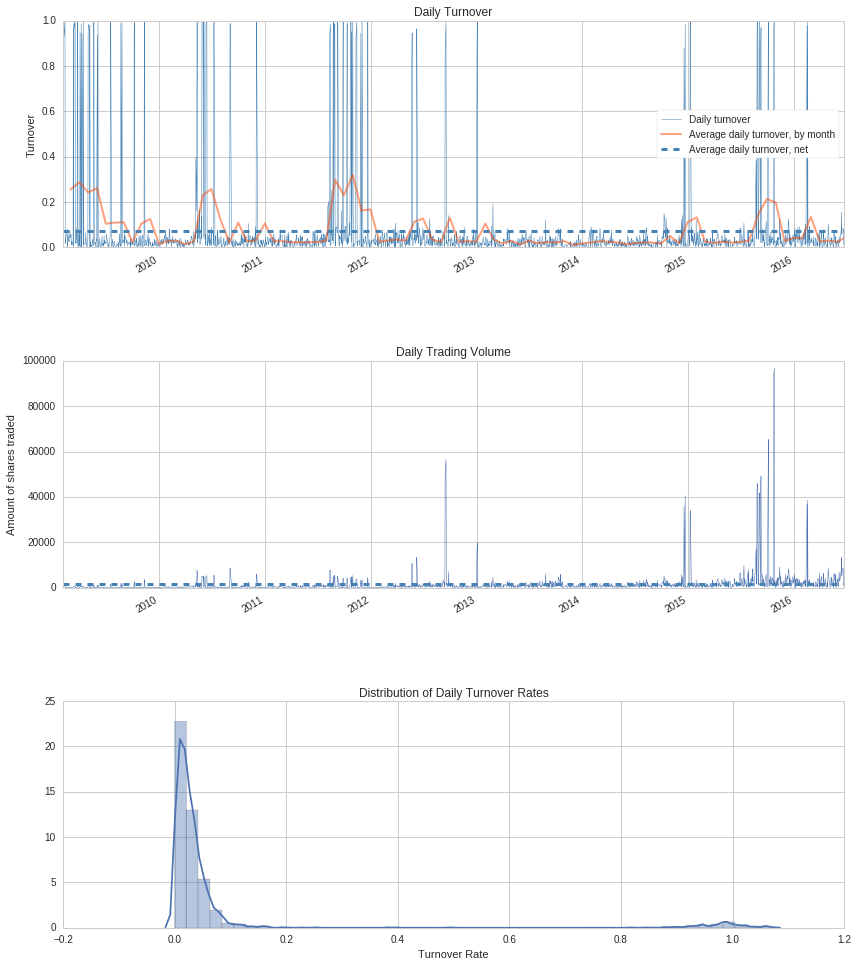

In [1]:
bt = get_backtest('577d63a0a2f9b60f9a29bdf7')
bt.create_full_tear_sheet()

### Roll Returns Strategy

This second strategy builds off the first, but takes the near-term vix futures price as a trading signal

Note: Futures data is not currently on Quantopian, but it is [coming soon](https://www.quantopian.com/futures). 

**To view an expanded view of the backtest tearsheet, click the left margin of the cell**

100% Time: 0:00:13|###########################################################|
Entire data start date: 2009-02-02
Entire data end date: 2016-07-08


Backtest Months: 89
                   Backtest
annual_return          0.37
annual_volatility      0.45
sharpe_ratio           0.92
calmar_ratio           0.61
stability              0.89
max_drawdown          -0.61
omega_ratio            1.19
sortino_ratio          1.32
skewness              -0.31
kurtosis               2.91
information_ratio      0.04
alpha                  0.35
beta                   0.51

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
4              60.93 2011-04-28  2011-12-08    2012-09-06      356
0              46.71 2014-12-05  2015-01-29    2015-11-25      254
3              38.30 2013-08-05  2013-10-15    2014-01-29      128
1              26.42 2016-06-06  2016-06-15           NaT      NaN
2              25.12 2015-12-29  2016-02-24    2016-04-18       80


2-sigma re

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


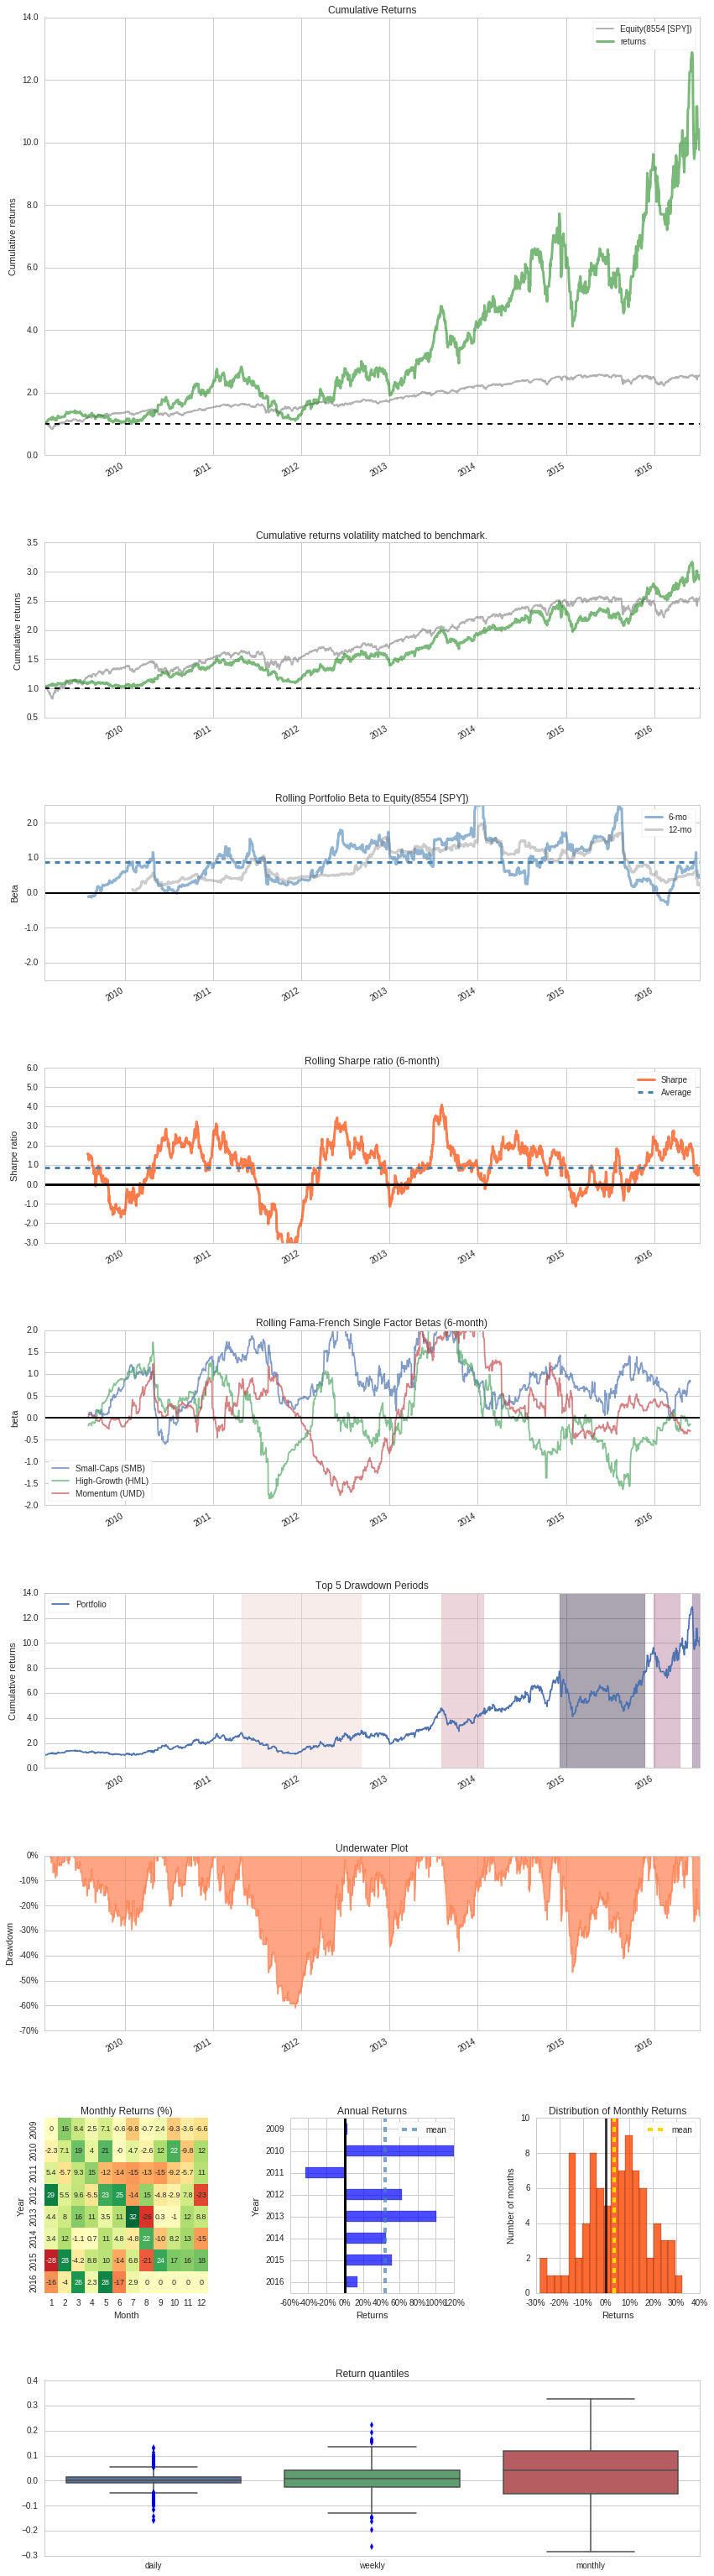


Stress Events
                                    mean    min    max
US downgrade/European Debt Crisis -0.002 -0.160  0.045
Fukushima                          0.007 -0.028  0.050
EZB IR Event                      -0.009 -0.078  0.067
2009Q1                             0.008 -0.010  0.062
2009Q2                             0.003 -0.067  0.066
Flash Crash                        0.007  0.000  0.029
Apr14                              0.001 -0.021  0.060
Oct14                              0.004 -0.050  0.098
Fall2015                           0.003 -0.056  0.081
GFC Crash                          0.005 -0.067  0.066
Recovery                           0.001 -0.160  0.100
New Normal                         0.002 -0.156  0.131


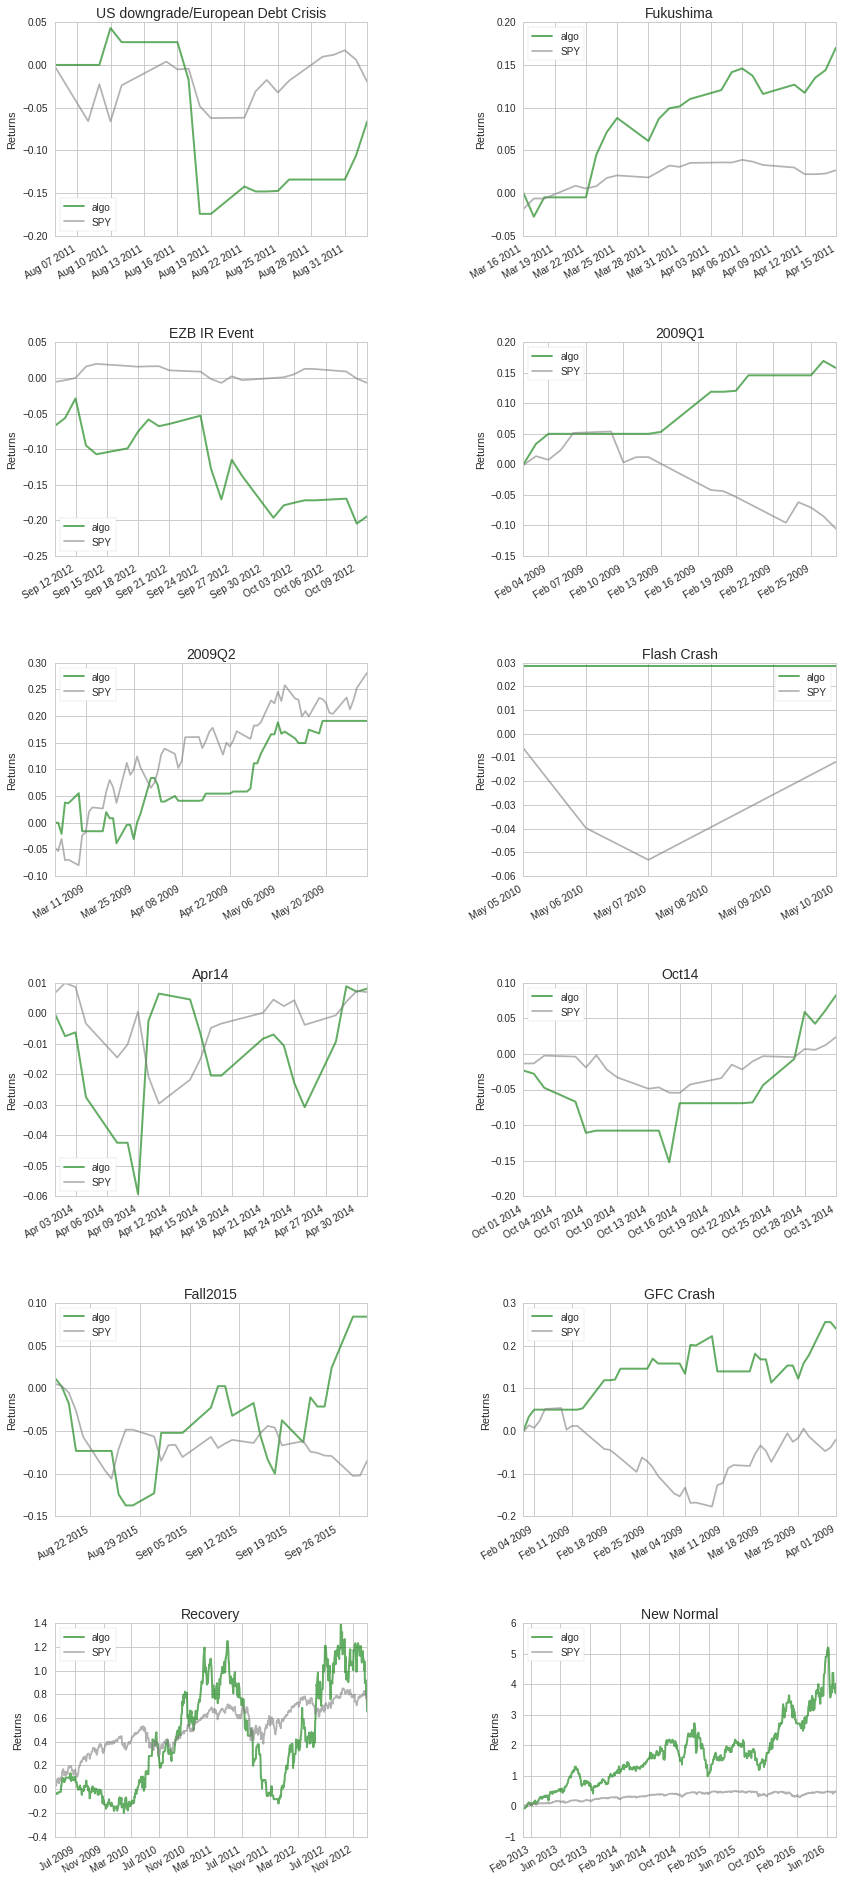



Top 10 long positions of all time (and max%)
[u'VXX-38054']
[ 1.029]


Top 10 short positions of all time (and max%)
[u'VXX-38054']
[-1.278]


Top 10 positions of all time (and max%)
[u'VXX-38054']
[ 1.278]


All positions ever held
[u'VXX-38054']
[ 1.278]




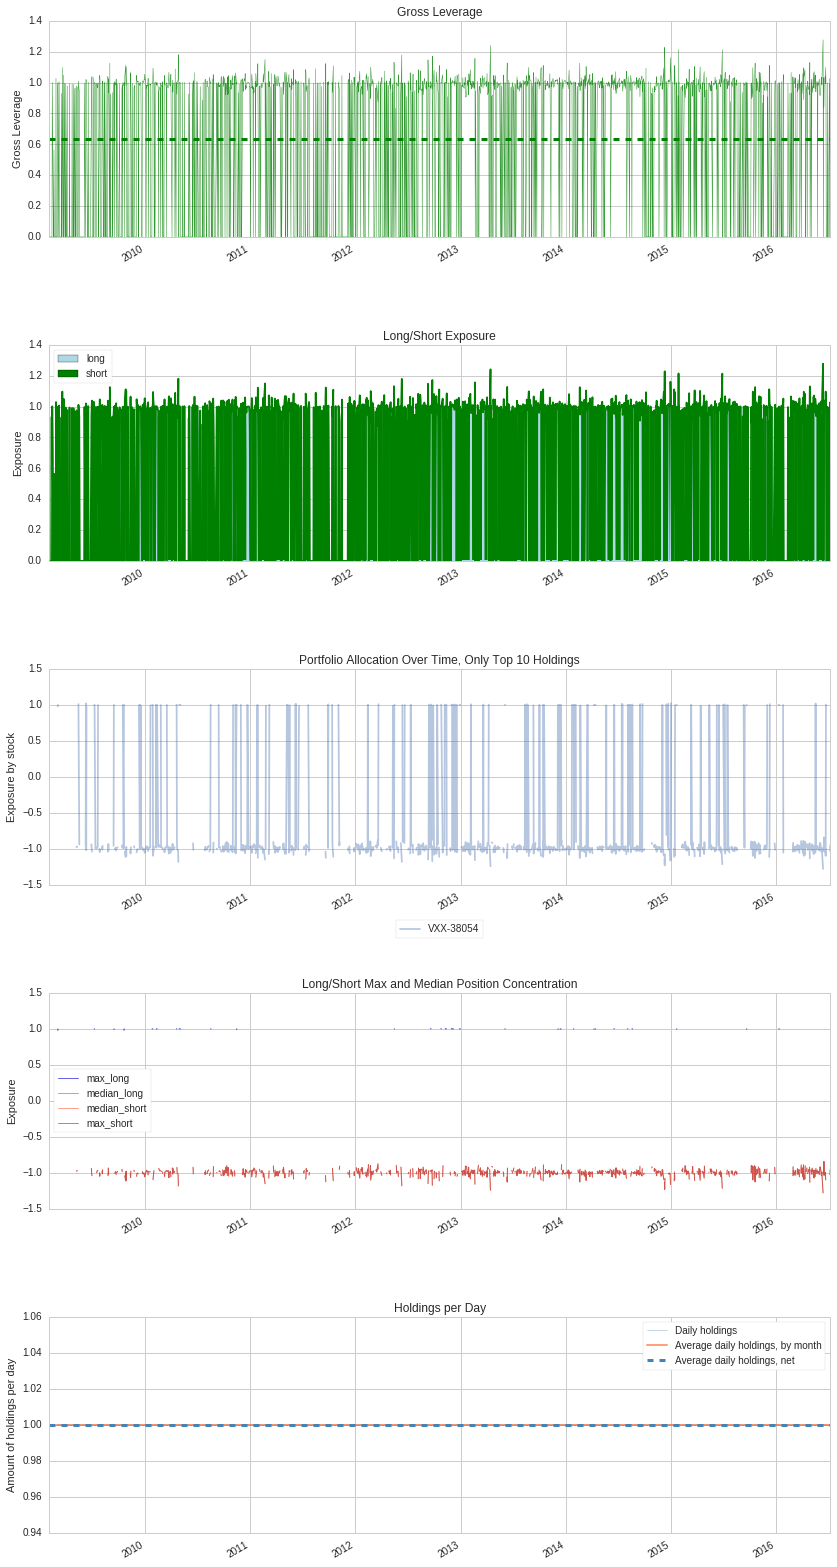

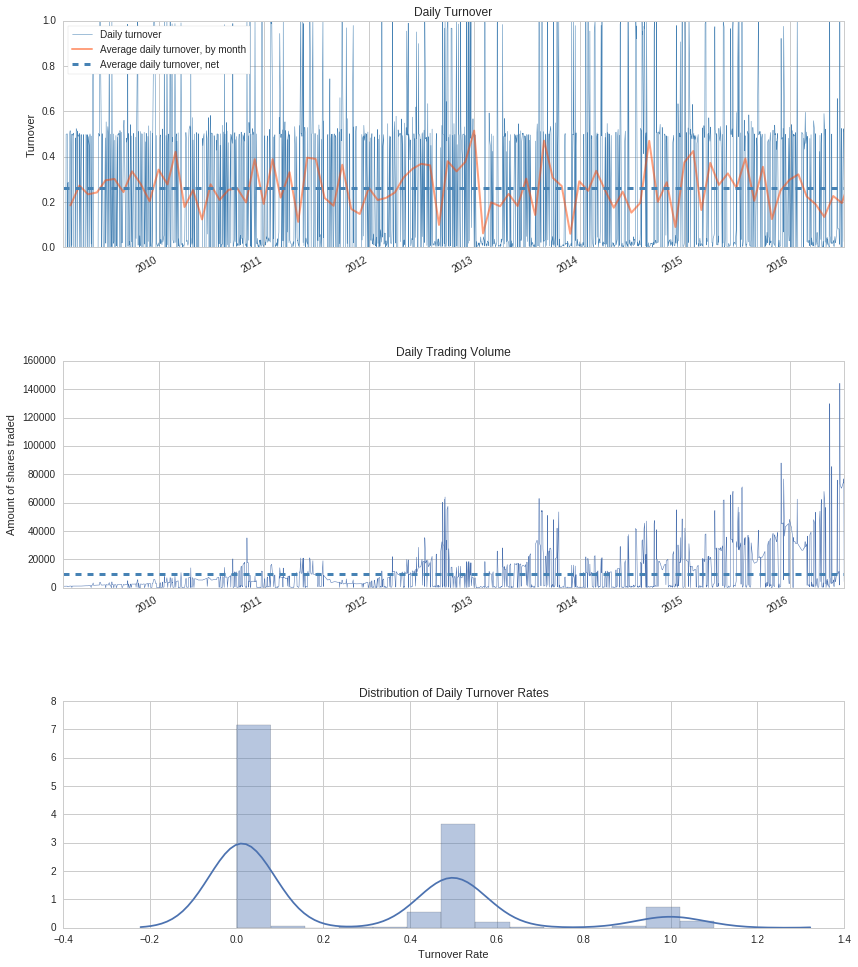

In [1]:
bt = get_backtest('5783f9777d65070f868fc6c5')
bt.create_full_tear_sheet()

Feel free to apply your own volatility prediction models to the algorithm, or change the tests for your own needs.

*The material on this website is provided for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation or endorsement for any security or strategy, nor does it constitute an offer to provide investment advisory or other services by Quantopian.
In addition, the content of the website neither constitutes investment advice nor offers any opinion with respect to the suitability of any security or any specific investment. Quantopian makes no guarantees as to accuracy or completeness of the views expressed in the website. The views are subject to change, and may have become unreliable for various reasons, including changes in market conditions or economic circumstances.*
